In [1]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

## Noise with DET and RC lasers on
PMT at -850 V

In [2]:
fname = "2020_11_5.hdf"
dset_name = "1604611132 check noise without yag firing"

devices = ()

In [3]:
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [4]:
pmt_channel = 1
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1,len(pxie)+1)])

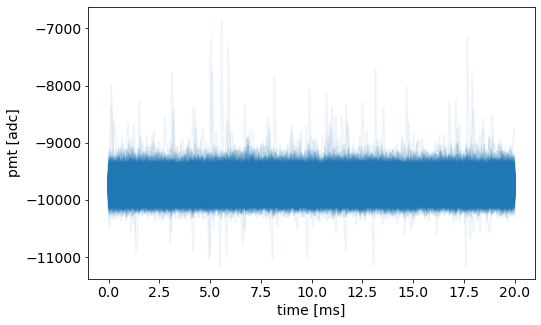

In [5]:
fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999,2000)/100
ax.plot(_x, pmt_data.T, color = 'C0', alpha = 0.075)

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

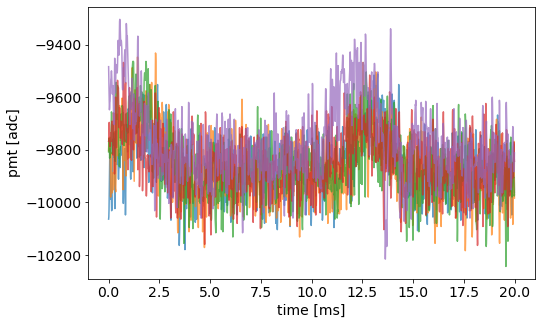

In [6]:
_x = np.linspace(0,1999,2000)/100

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(_x, pmt_data[10:20:2].T, alpha = 0.7)

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

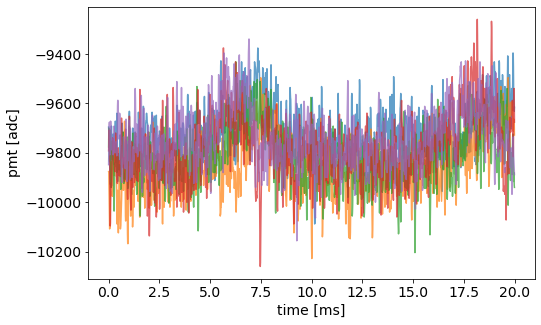

In [7]:
idx = 11
_x = np.linspace(0,1999,2000)/100

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(_x, pmt_data[idx:idx+10:2].T, alpha = 0.7)

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

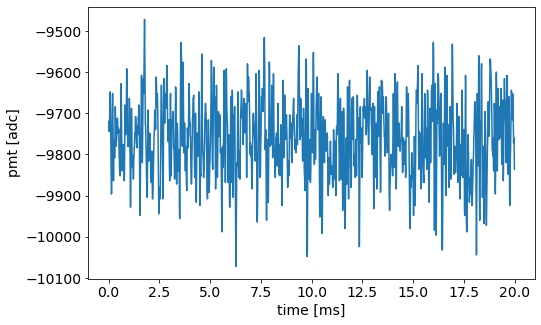

In [8]:
idx = 600
_x = np.linspace(0,1999,2000)/100

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(_x, pmt_data[idx].T)

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

(array([  3.,  11.,  72., 303., 605., 611., 315.,  67.,  11.,   2.]),
 array([-10400. , -10267.6, -10135.2, -10002.8,  -9870.4,  -9738. ,
         -9605.6,  -9473.2,  -9340.8,  -9208.4,  -9076. ]),
 <BarContainer object of 10 artists>)

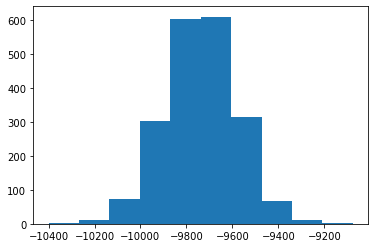

In [12]:
plt.hist(pmt_data[:,0])

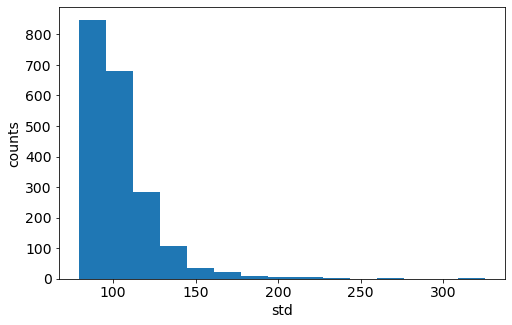

In [295]:
fig, ax = plt.subplots(figsize = (8,5))

ax.hist(np.std(pmt_data, axis = 1), bins = 15);
ax.set_xlabel('std')
ax.set_ylabel('counts')

set_fontsize(ax, 14)

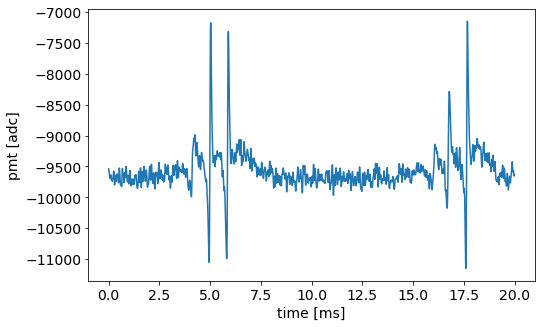

In [296]:
_x = np.linspace(0,1999,2000)/100
idx = np.argmax(np.std(pmt_data, axis = 1))
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(_x, pmt_data[idx])
ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')
set_fontsize(ax, 14)

pmt det + rc laser noise -> -9737.0 +/- 153.1


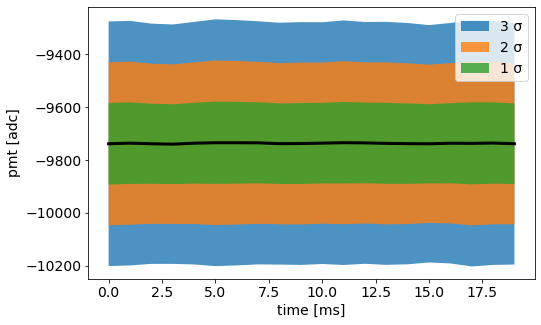

In [298]:
pmt_channel = 1
n_avg = 100

signal_mean = pmt_data.mean(axis = 0).reshape(-1,n_avg).mean(axis = 1)
signal_std = np.std(pmt_data, axis = 0).reshape(-1,n_avg).mean(axis = 1)

fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999//n_avg,2000//n_avg)/(100//n_avg)


for σval in range(3,0,-1):
    ax.fill_between(_x, signal_mean-σval*signal_std, signal_mean+σval*signal_std, alpha = 0.8,
                    label = f'{σval} σ')

ax.plot(_x, signal_mean, color = 'k', lw = 3);
ax.legend(fontsize = 14)
ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

print(f'pmt det + rc laser noise -> {pmt_data.mean():.1f} +/- {np.std(pmt_data, axis = 0).mean():.1f}')

## Noise with only DET

In [281]:
fname = "2020_11_5.hdf"
dset_name = "1604611403 check noise without yag firing and without rc"

devices = ()

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

pmt_channel = 1
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1,len(pxie)+1)])

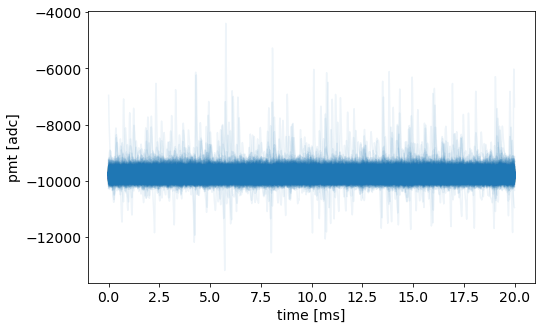

In [282]:
fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999,2000)/100
ax.plot(_x, pmt_data.T, color = 'C0', alpha = 0.075);

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

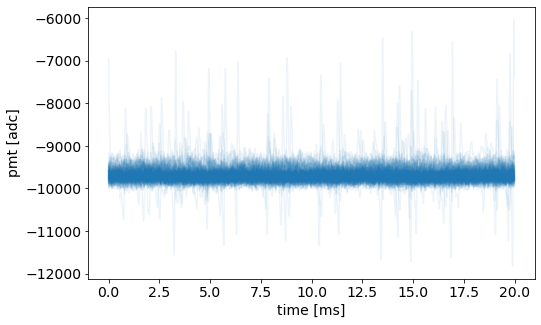

In [283]:
pmt_channel = 1
fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999,2000)/100
ax.plot(_x, pmt_data[:100].T, color = 'C0', alpha = 0.075);

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

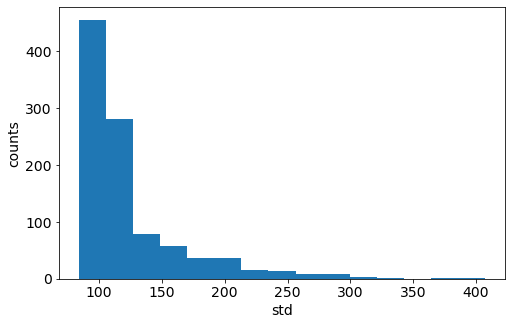

In [284]:
fig, ax = plt.subplots(figsize = (8,5))

ax.hist(np.std(pmt_data, axis = 1), bins = 15);
ax.set_xlabel('std')
ax.set_ylabel('counts')

set_fontsize(ax, 14)

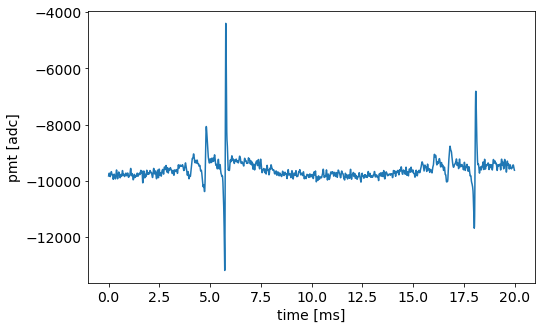

In [285]:
_x = np.linspace(0,1999,2000)/100
idx = np.argmax(np.std(pmt_data, axis = 1))
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(_x, pmt_data[idx])
ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')
set_fontsize(ax, 14)

pmt det laser noise -> -9779.1 +/- 162.5


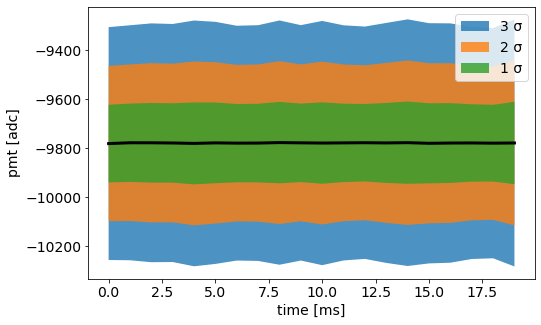

In [287]:
pmt_channel = 1
n_avg = 100

signal_mean = pmt_data.mean(axis = 0).reshape(-1,n_avg).mean(axis = 1)
signal_std = np.std(pmt_data, axis = 0).reshape(-1,n_avg).mean(axis = 1)

fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999//n_avg,2000//n_avg)/(100//n_avg)


for σval in range(3,0,-1):
    ax.fill_between(_x, signal_mean-σval*signal_std, signal_mean+σval*signal_std, alpha = 0.8,
                    label = f'{σval} σ')

ax.plot(_x, signal_mean, color = 'k', lw = 3);
ax.legend(fontsize = 14)
ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

print(f'pmt det laser noise -> {pmt_data.mean():.1f} +/- {np.std(pmt_data, axis = 0).mean():.1f}')

## Noise without Lasers

In [278]:
fname = "2020_11_9.hdf"
dset_name = "1604959632 PMT noise no laser"

devices = ()

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

pmt_channel = 1
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1,len(pxie)+1)])

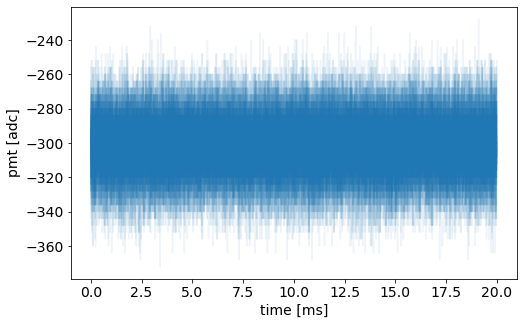

In [279]:
fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999,2000)/100
ax.plot(_x, pmt_data.T, color = 'C0', alpha = 0.075);

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

pmt bg noise -> -301.8 +/- 16.7


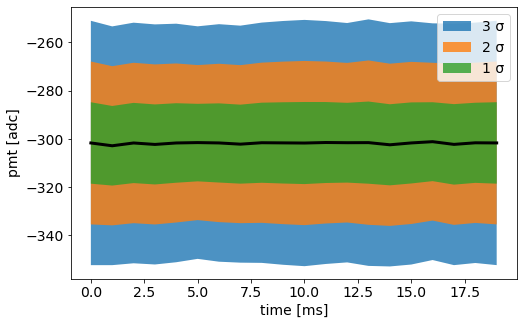

In [280]:
pmt_channel = 1
n_avg = 100

signal_mean = pmt_data.mean(axis = 0).reshape(-1,n_avg).mean(axis = 1)
signal_std = np.std(pmt_data, axis = 0).reshape(-1,n_avg).mean(axis = 1)

fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999//n_avg,2000//n_avg)/(100//n_avg)


for σval in range(3,0,-1):
    ax.fill_between(_x, signal_mean-σval*signal_std, signal_mean+σval*signal_std, alpha = 0.8,
                    label = f'{σval} σ')

ax.plot(_x, signal_mean, color = 'k', lw = 3);
ax.legend(fontsize = 14)
ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

print(f'pmt bg noise -> {pmt_data.mean():.1f} +/- {np.std(pmt_data, axis = 0).mean():.1f}')

## Amplifier Noise

In [256]:
fname = "2020_11_9.hdf"
dset_name = "1604959698 amp noise"

devices = ()

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

pmt_channel = 1
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1,len(pxie)+1)])

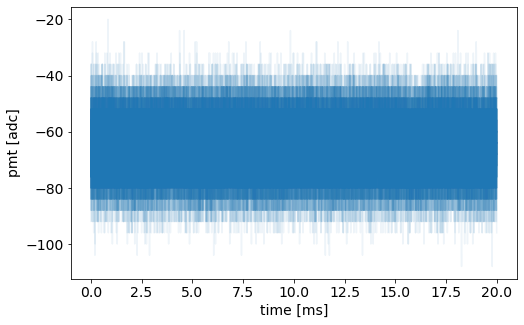

In [257]:
fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999,2000)/100
ax.plot(_x, pmt_data.T, color = 'C0', alpha = 0.075);

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

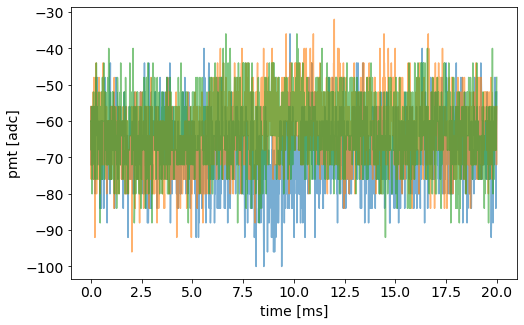

In [267]:
idx = 5
fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999,2000)/100
ax.plot(_x, pmt_data[idx:idx+3].T, alpha = 0.6);

ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

adc + amp noise -> -65.2 +/- 9.4


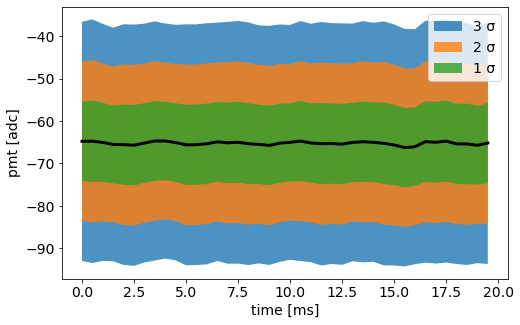

In [276]:
pmt_channel = 1
n_avg = 50

signal_mean = pmt_data.mean(axis = 0).reshape(-1,n_avg).mean(axis = 1)
signal_std = np.std(pmt_data, axis = 0).reshape(-1,n_avg).mean(axis = 1)

fig, ax = plt.subplots(figsize = (8,5))

_x = np.linspace(0,1999//n_avg,2000//n_avg)/(100/n_avg)


for σval in range(3,0,-1):
    ax.fill_between(_x, signal_mean-σval*signal_std, signal_mean+σval*signal_std, alpha = 0.8,
                    label = f'{σval} σ')

ax.plot(_x, signal_mean, color = 'k', lw = 3);
ax.legend(fontsize = 14)
ax.set_xlabel('time [ms]')
ax.set_ylabel('pmt [adc]')

set_fontsize(ax, 14)

print(f'adc + amp noise -> {pmt_data.mean():.1f} +/- {np.std(pmt_data, axis = 0).mean():.1f}')